<a href="https://colab.research.google.com/github/146790g/VGG19-BreakHis-Non-Transfer-Learning-with-Augmentation/blob/master/VGG19_BreakHis_Non_Transfer_Learning_with_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

%pwd
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%pwd

'/content'

In [ ]:



import numpy as np 
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras import layers
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras import optimizers
from keras.applications.resnet50 import ResNet50
from keras.applications.densenet import DenseNet169,DenseNet201
from keras.applications.nasnet import NASNetLarge
from keras.layers import Input
from sklearn.model_selection import train_test_split
import cv2

print(os.getcwd())

import os
print(os.listdir('/content/gdrive/My Drive/Colab Notebooks/BreakHis_ResNet50/data'))

afiles = os.listdir('/content/gdrive/My Drive/Colab Notebooks/BreakHis_ResNet50/data')

print(afiles)

print(afiles[1])


/content
['40X', '100X', '200X', '400X']
['40X', '100X', '200X', '400X']
100X


In [ ]:
Bimgs =[]

for file in [afiles[1]]:
    pics= [os.path.join(root, file)  for root,dirs,files in os.walk('/content/gdrive/My Drive/Colab Notebooks/BreakHis_ResNet50/data/{}/benign'.format(file)) for file in files]
    Bimgs.extend(pics)

print(Bimgs)
print(len(Bimgs))

Mimgs =[]

for file in [afiles[1]]:
    pics= [os.path.join(root, file)  for root,dirs,files in os.walk('/content/gdrive/My Drive/Colab Notebooks/BreakHis_ResNet50/data/{}/malignant'.format(file)) for file in files]
    Mimgs.extend(pics)

print(Mimgs)
print(len(Mimgs))



['/content/gdrive/My Drive/Colab Notebooks/BreakHis_ResNet50/data/100X/benign/SOB_B_F-14-21998CD-100-022.png', '/content/gdrive/My Drive/Colab Notebooks/BreakHis_ResNet50/data/100X/benign/SOB_B_F-14-14134-100-006.png', '/content/gdrive/My Drive/Colab Notebooks/BreakHis_ResNet50/data/100X/benign/SOB_B_F-14-25197-100-002.png', '/content/gdrive/My Drive/Colab Notebooks/BreakHis_ResNet50/data/100X/benign/SOB_B_F-14-21998EF-100-029.png', '/content/gdrive/My Drive/Colab Notebooks/BreakHis_ResNet50/data/100X/benign/SOB_B_A-14-22549G-100-007.png', '/content/gdrive/My Drive/Colab Notebooks/BreakHis_ResNet50/data/100X/benign/SOB_B_A-14-22549CD-100-025.png', '/content/gdrive/My Drive/Colab Notebooks/BreakHis_ResNet50/data/100X/benign/SOB_B_A-14-22549CD-100-034.png', '/content/gdrive/My Drive/Colab Notebooks/BreakHis_ResNet50/data/100X/benign/SOB_B_F-14-23060CD-100-009.png', '/content/gdrive/My Drive/Colab Notebooks/BreakHis_ResNet50/data/100X/benign/SOB_B_F-14-14134E-100-012.png', '/content/gdriv

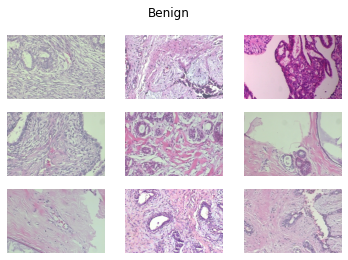

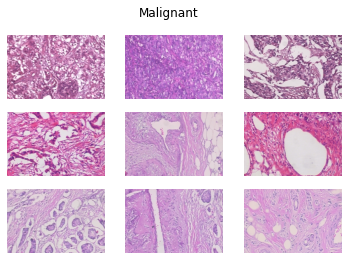

In [ ]:



fig,ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        img = plt.imread(Bimgs[j+3*i])
        ax[i,j].imshow(img)
        ax[i,j].axis('off')
fig.suptitle('Benign')
###

fig,ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        img = plt.imread(Mimgs[j+3*i])
        ax[i,j].imshow(img)
        ax[i,j].axis('off')
fig.suptitle('Malignant')
plt.show()



In [ ]:


shape = cv2.imread(Bimgs[0]).shape

print(shape)


(460, 700, 3)


In [ ]:


size = (224,224)


B_X=[]
for x in Bimgs: 
    im = cv2.imread(x)
    im = cv2.resize(im,size,interpolation=cv2.INTER_AREA)
    B_X.append(im)
    del im

print(B_X)
print(B_X[0].shape)    

[array([[[156, 151, 155],
        [185, 173, 185],
        [194, 185, 192],
        ...,
        [151, 135, 142],
        [161, 145, 153],
        [157, 143, 148]],

       [[145, 134, 144],
        [183, 168, 183],
        [196, 182, 191],
        ...,
        [169, 158, 162],
        [170, 154, 162],
        [156, 139, 146]],

       [[137, 122, 134],
        [159, 141, 155],
        [183, 167, 175],
        ...,
        [171, 163, 167],
        [161, 145, 152],
        [143, 125, 131]],

       ...,

       [[182, 194, 186],
        [183, 191, 188],
        [187, 191, 191],
        ...,
        [184, 169, 174],
        [174, 164, 167],
        [149, 144, 144]],

       [[203, 221, 210],
        [196, 213, 202],
        [199, 213, 206],
        ...,
        [169, 156, 159],
        [187, 182, 183],
        [177, 175, 175]],

       [[203, 226, 215],
        [204, 228, 216],
        [204, 226, 213],
        ...,
        [149, 137, 140],
        [171, 172, 173],
        [206, 201, 202]

In [ ]:


M_X=[]
for x in Mimgs: 
    im = cv2.imread(x)
    im = cv2.resize(im,size,interpolation=cv2.INTER_AREA)
    M_X.append(im)
    del im

print(M_X[0].shape)


In [ ]:


B_Y = [0 for x in range(len(Bimgs))]
M_Y = [1 for x in range(len(Mimgs))]
X = np.array(B_X+M_X)
Y = np.array(B_Y+M_Y)



In [ ]:
num_classes=2

X_train, X_test, Y_train, Y_test = train_test_split(np.array(X), np.array(Y), test_size=0.2, random_state=43)

from keras.utils.np_utils import to_categorical
y_trainCat=to_categorical(Y_train,num_classes=num_classes)
y_testCat=to_categorical(Y_test,num_classes=num_classes)
y_all=to_categorical(Y,num_classes=num_classes)


print(X_test)
print(len(X_train))
print(len(X_test))
print(len(Y_test))
print(y_testCat)


[[[[236 227 239]
   [241 226 243]
   [243 225 242]
   ...
   [236 173 226]
   [203 142 187]
   [218 170 206]]

  [[235 228 240]
   [241 228 245]
   [242 227 244]
   ...
   [232 169 222]
   [202 143 188]
   [222 175 211]]

  [[235 225 239]
   [242 228 245]
   [240 227 243]
   ...
   [228 166 220]
   [201 142 188]
   [208 168 204]]

  ...

  [[236 219 233]
   [248 224 243]
   [245 221 239]
   ...
   [211 168 199]
   [242 220 245]
   [239 227 246]]

  [[233 217 232]
   [246 222 243]
   [248 225 243]
   ...
   [210 165 198]
   [239 216 242]
   [236 220 239]]

  [[229 212 228]
   [239 216 239]
   [242 220 239]
   ...
   [212 164 199]
   [238 209 237]
   [236 216 237]]]


 [[[166 144 148]
   [134  98 109]
   [138  95 113]
   ...
   [186 178 194]
   [184 169 189]
   [164 142 161]]

  [[146 124 128]
   [131  93 104]
   [140  93 113]
   ...
   [177 167 184]
   [188 171 190]
   [174 155 171]]

  [[138 118 123]
   [132  99 109]
   [140  96 115]
   ...
   [182 169 188]
   [181 162 182]
   [176 156

In [ ]:



datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


batch_size = 38
epochs = 5
input_shape = X[0].shape
e = 2

#MODEL={'VGG16':VGG16, \
#      'VGG19':VGG19, \
#      'ResNet50':ResNet50}


#name = 'ResNet50'

from keras.applications.vgg19 import VGG19

model =VGG19(input_shape=input_shape,weights=None,include_top=True,classes=num_classes)

model.summary()



Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:




adam = Adam(lr=0.0001)
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=adam,metrics=['accuracy'])



In [ ]:


history = model.fit(datagen.flow(X_train,y_trainCat,
                              batch_size=batch_size),
                              steps_per_epoch=len(X_train) / 38, 
                              epochs=epochs,
                              verbose=0,
                              validation_data = [X_test, y_testCat])



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
44/44 [==============================] - 56s 1s/step - loss: 0.6690 - accuracy: 0.6782 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/50
44/44 [==============================] - 57s 1s/step - loss: 0.5539 - accuracy: 0.7111 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/50
44/44 [==============================] - 57s 1s/step - loss: 0.4926 - accuracy: 0.7907 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/50
44/44 [==============================] - 57s 1s/step - loss: 0.5209 - accuracy: 0.7781 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/50
44/44 [==============================] - 57s 1s/step - loss: 0.4832 - accuracy: 0.7984 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/50
44/44 [==============================] - 57s 1s/step - loss: 0.5313 - accuracy: 0.7745 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/50
44/44 [==================

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-1ec9f76af414>", line 7, in <module>
    validation_data = [X_test, y_testCat])
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/util/deprecation.py", line 324, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py", line 1829, in fit_generator
    initial_epoch=initial_epoch)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(self, *args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py", line 1098, in fit
    tmp_logs = train_function(iterator)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/eager/def_function.py", line 

KeyboardInterrupt: ignored

In [ ]:


result_dir = '/content/gdrive/My Drive/Colab Notebooks/BreakHis_ResNet50/result'  

#with open(os.path.join(result_dir,'breakhis_ResNet50.json'),'w') as json_file:
#  json_file.write(model.to_json())

#model parameter save
model.save_weights(os.path.join(result_dir,'breakhis_ResNet50parameter.h5'))


# model save
model.save(os.path.join(result_dir,'breakhis_ResNet50_model.h5'))



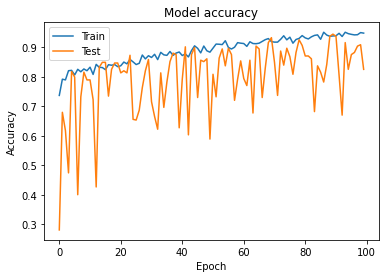

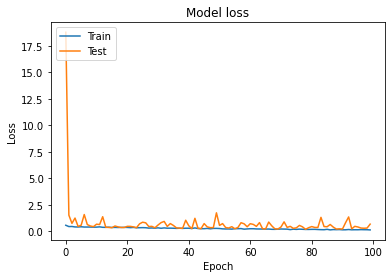

In [ ]:


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# 新しいセクション